In [1]:
import nest
import network
import addons
import numpy as np
from network_params import net_dict
import network_params
from sim_params import sim_dict
from stimulus_params import stim_dict
from scipy.signal import argrelextrema


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.


Initialize the network with simulation, network and stimulation parameters, then create and connect all nodes, and finally simulate. The times for a presimulation and the main simulation are taken independently. A presimulation is useful because the spike activity typically exhibits a startup transient. In benchmark simulations, this transient should be excluded from a time measurement of the state propagation phase. Besides, statistical measures of the spike activity should only be computed after the transient has passed.

In [2]:
def filter_signal(data,fs,lowcut,highcut,order=3):

    return addons.butter_bandpass_filter(data,lowcut,highcut,fs,order)

In [3]:
import math 
from scipy.fftpack import *

def hilbert_transform(signal):
    '''
    N : fft length
    M : number of elements to zero out
    U : DFT of signal
    V: IDFT of H(U) 
    '''

    N = len(signal)
    #take the forward Fourier transform
    U = fft(signal)
    M = N - N//2 - 1
    #Zero out negative frequency components
    U[N//2+1:] = [0] * M 
    #double fft energy except #DC0
    U[1:N//2] = 2 * U[1:N//2]
    #take inverse of Fourier transform
    v = ifft(U)
    return v 

In [4]:
import random
import helpers
def prepare_data(data_pop,ex_current_pop,in_current_pop):
    sd_names, node_ids, data = helpers.__load_spike_times(name,"spike_recorder",addons.analysis_dict["analysis_start"], addons.analysis_dict["analysis_end"])
#TODO: FIX THIS
    times = {}
    data_voltages = np.zeros((8,1000))
    data_excitatory = np.zeros((8,1000))
    data_inhibitory = np.zeros((8,1000))
    data_excitatory_sum = np.zeros((8,1000))
    data_inhibitory_sum = np.zeros((8,1000))
    bins = {}

    names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]



    for i in range(len(data_pop)):
        random.shuffle(data_pop[i])
        random.shuffle(ex_current_pop[i])
        random.shuffle(in_current_pop[i])
        data_voltages[i] =  np.mean(data_pop[i][0:1000],axis=0)
        data_excitatory[i] = np.mean(ex_current_pop[i][0:1000],axis=0)
        data_excitatory_sum[i] = np.sum(ex_current_pop[i][0:1000],axis=0)
        data_inhibitory[i] = np.mean(in_current_pop[i][0:1000],axis=0)
        data_inhibitory_sum[i] = np.sum(in_current_pop[i][0:1000],axis=0)
        neurons = np.unique(data[i]["sender"]) 
        random.shuffle(neurons)
        chosen_ones = neurons[1:1000]
        indices = []
        for indx in chosen_ones:
            indices = np.append(indices,np.where(data[i]["sender"]==indx))
        indices = np.array(indices,dtype=int)
        times_help = data[i][indices]["time_ms"] 
        times[i], bins[names[i]] = np.histogram(data[i][indices]["time_ms"], bins = int(addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"]/addons.analysis_dict["bin_size"]))

    #return data_voltages, times, times_help
    return data_voltages, data_excitatory, data_inhibitory, times, times_help, data_excitatory_sum, data_inhibitory_sum

Data will be written to: stimulation/data_pulse_packet_2_layers/
  Directory already existed. Old data will be overwritten.


RNG seed: 55
Total number of virtual processes: 10
Creating neuronal populations.

Sep 04 14:41:41 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Creating recording devices.
  Creating spike recorders.
  Creating voltmeters.
Creating Poisson generators for background input.
Connecting neuronal populations recurrently.
NodeCollection(metadata=None, model=iaf_psc_exp, size=20683, first=1, last=20683)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5834, first=20684, last=26517)
NodeCollection(metadata=None, model=iaf_psc_exp, size=21915, first=26518, last=48432)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5479, first=48433, last=53911)
NodeCollection(metadata=None, model=iaf_psc_exp, size=4850, first=53912, last=58761)
NodeCollection(metadata=None, model=iaf_psc_exp, size=1065, first=58762, last=59826)
No

/home/hyc_1/CorticalColumn_Github_1/CorticalColumn_Attempts/helpers.py:233: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Directory already existed
Directory already existed
Interval to compute firing rates: [ 900 1050] ms
Mean rates: [ 1.627  4.548  5.939  7.64   9.61  11.305  0.815  9.923] spikes/s
Standard deviation of rates: [3.541 5.96  6.741 7.837 8.827 9.471 2.544 8.735] spikes/s
Data will be written to: stimulation/data_pulse_packet_2_layers/
  Directory already existed. Old data will be overwritten.


RNG seed: 55
Total number of virtual processes: 10
Creating neuronal populations.

Sep 04 16:06:39 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Creating recording devices.
  Creating spike recorders.
  Creating voltmeters.
Creating Poisson generators for background input.
Creating external input for external stimulation.
Connecting neuronal populations recurrently.
NodeCollection(metadata=None, model=iaf_psc_exp, size=20683, first=1, last=20683)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5834, first=20684, last=26517)
NodeCollection(metadata=N

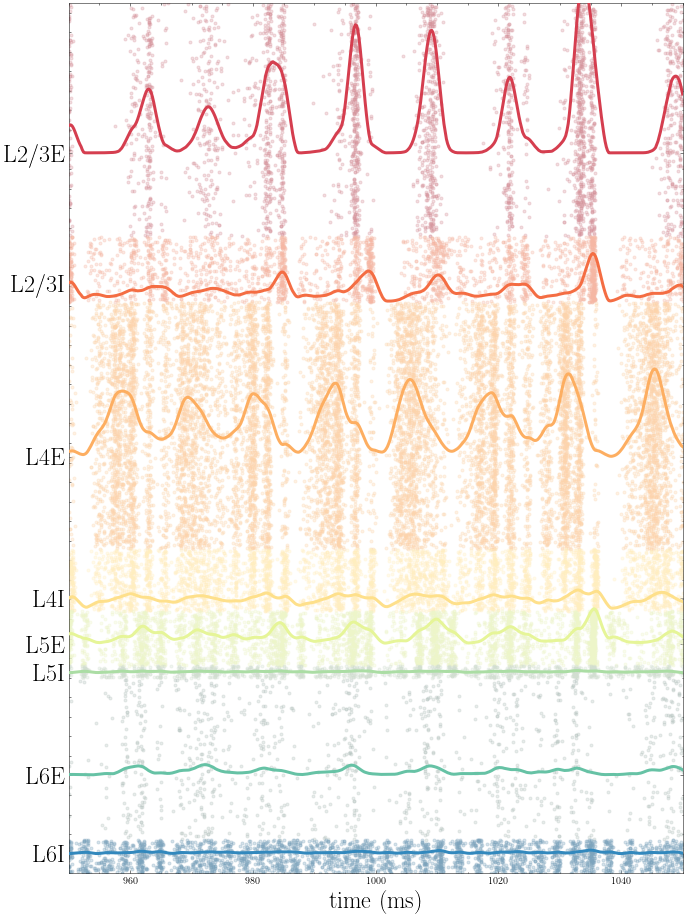

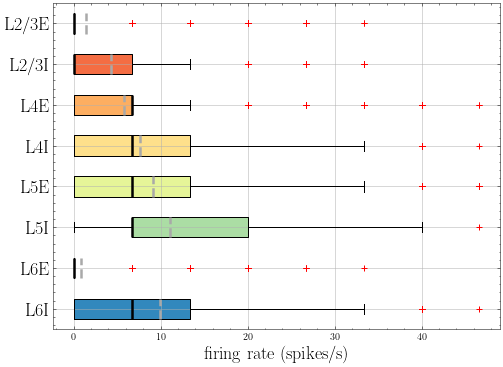

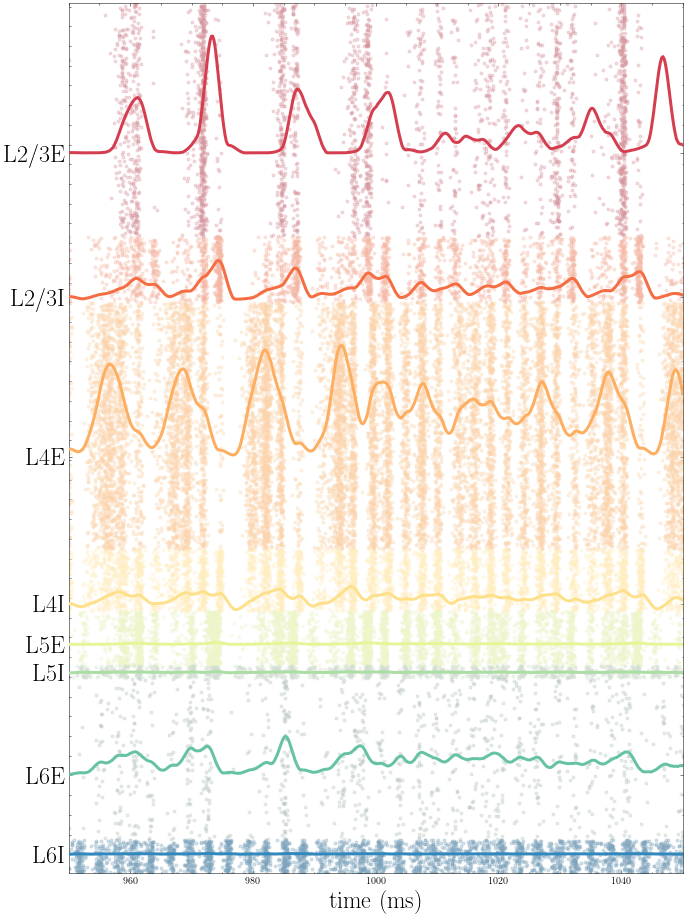

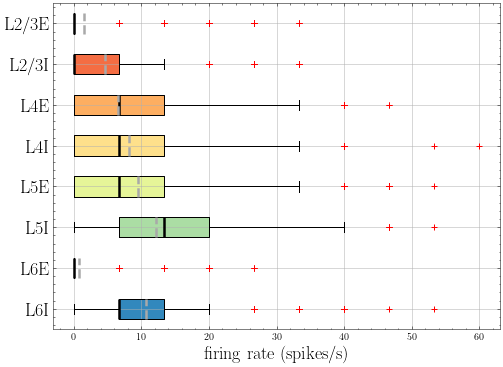

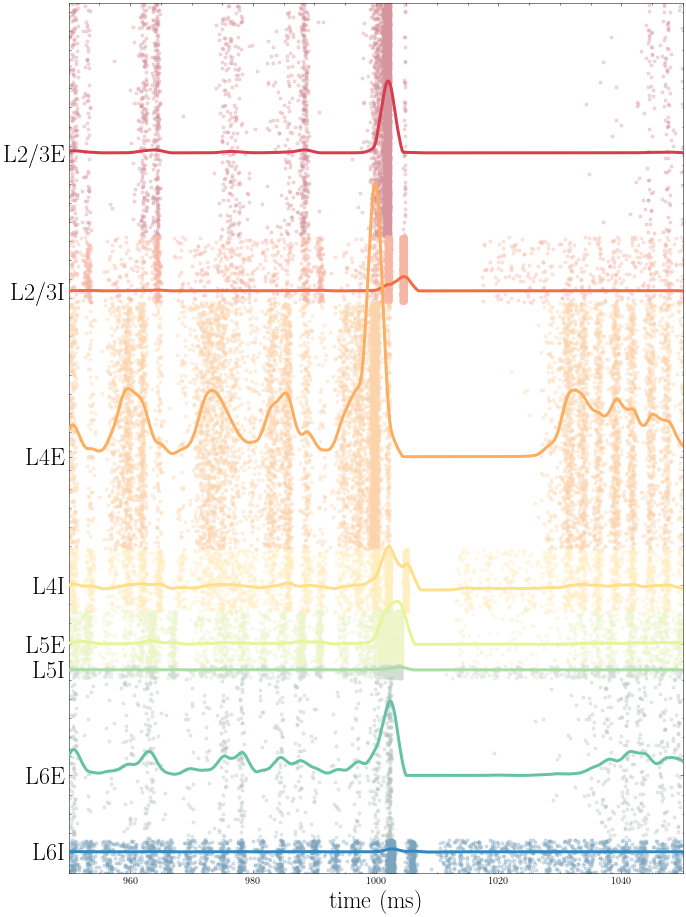

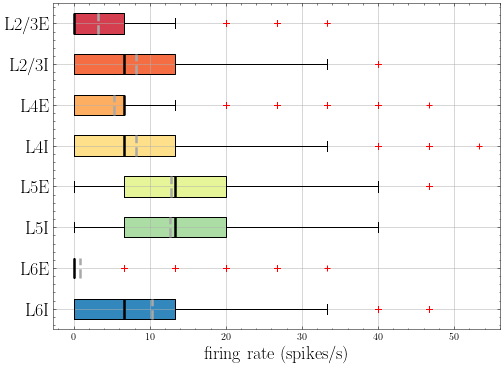

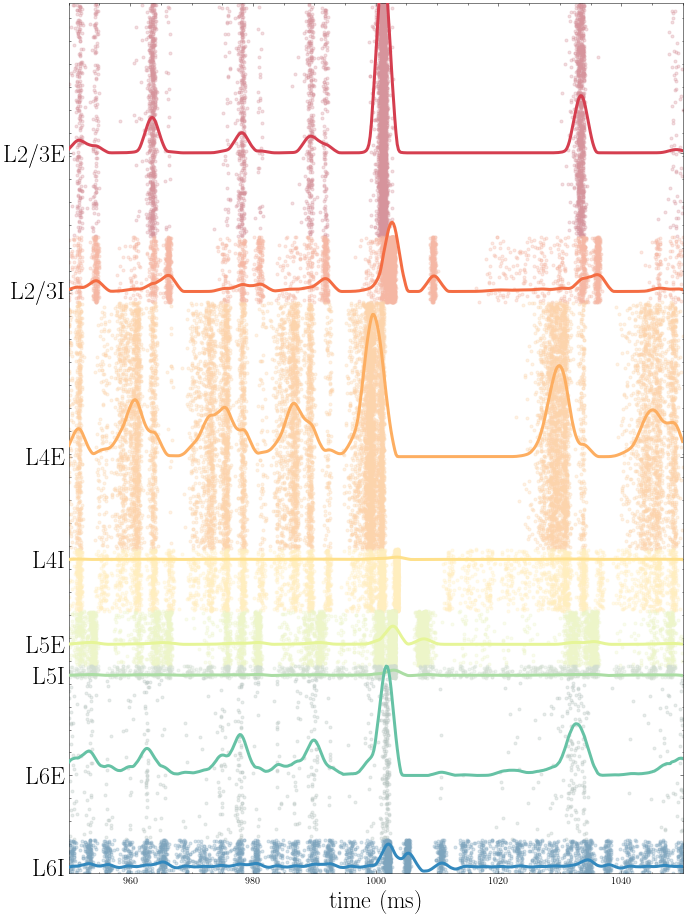

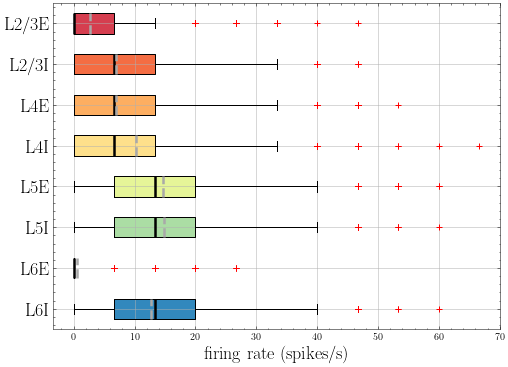

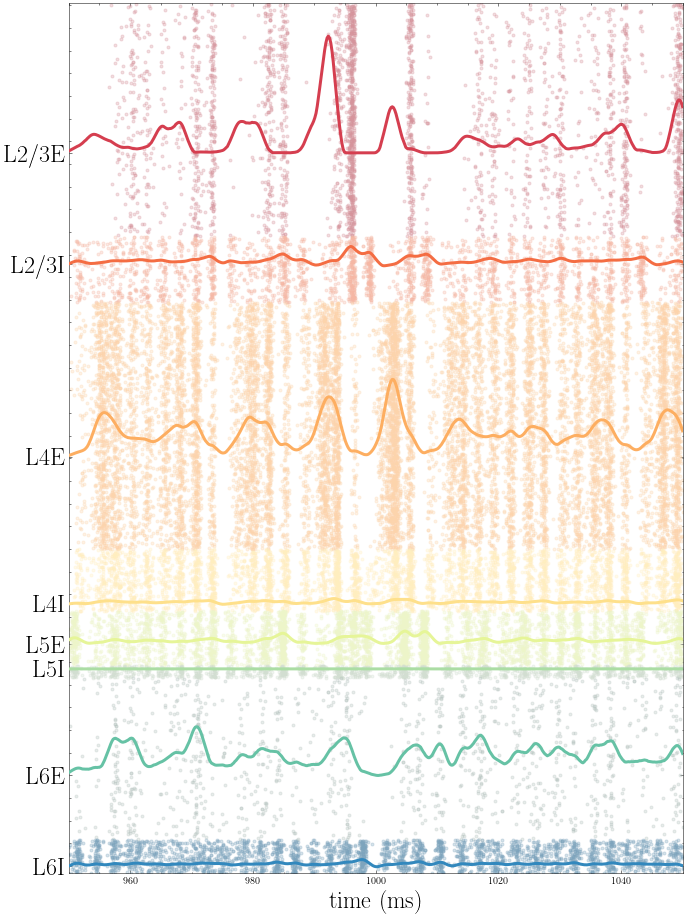

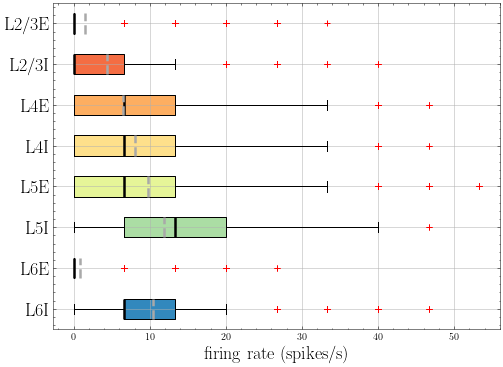

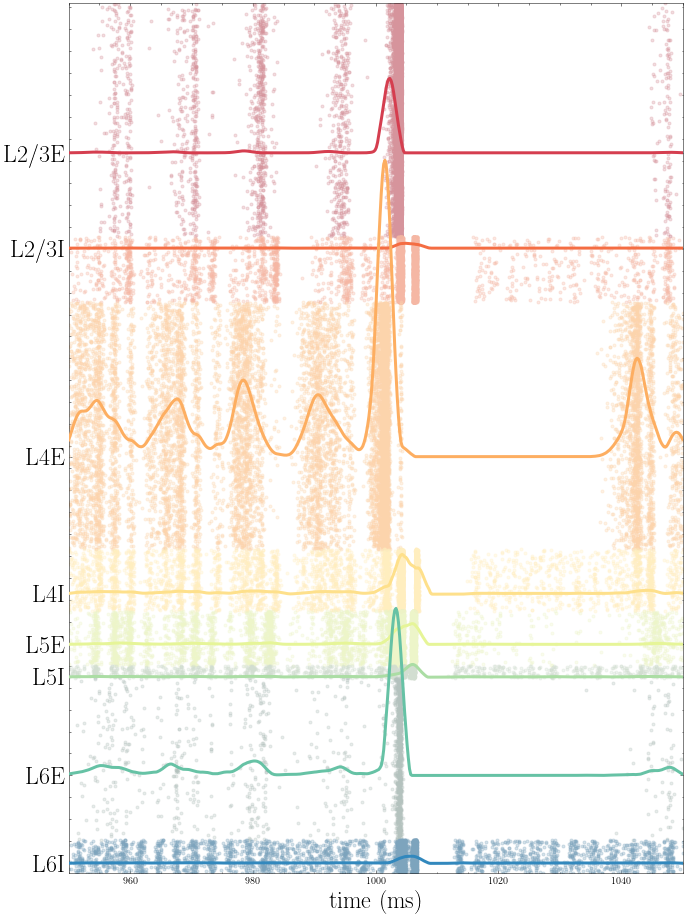

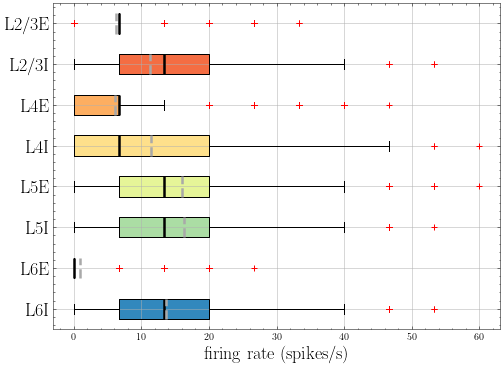

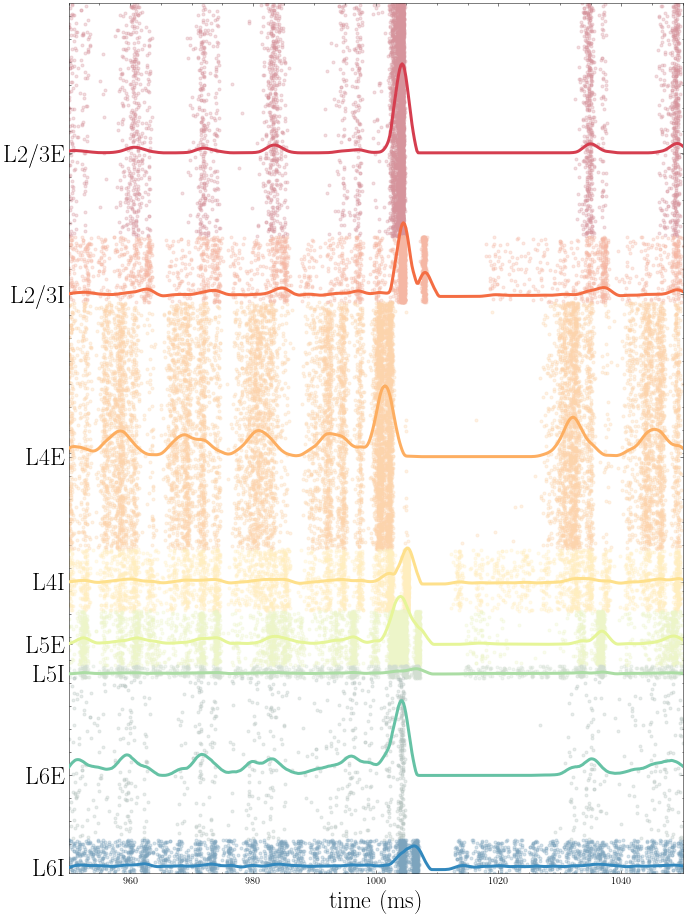

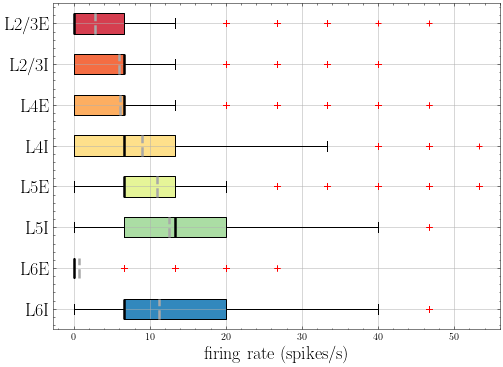

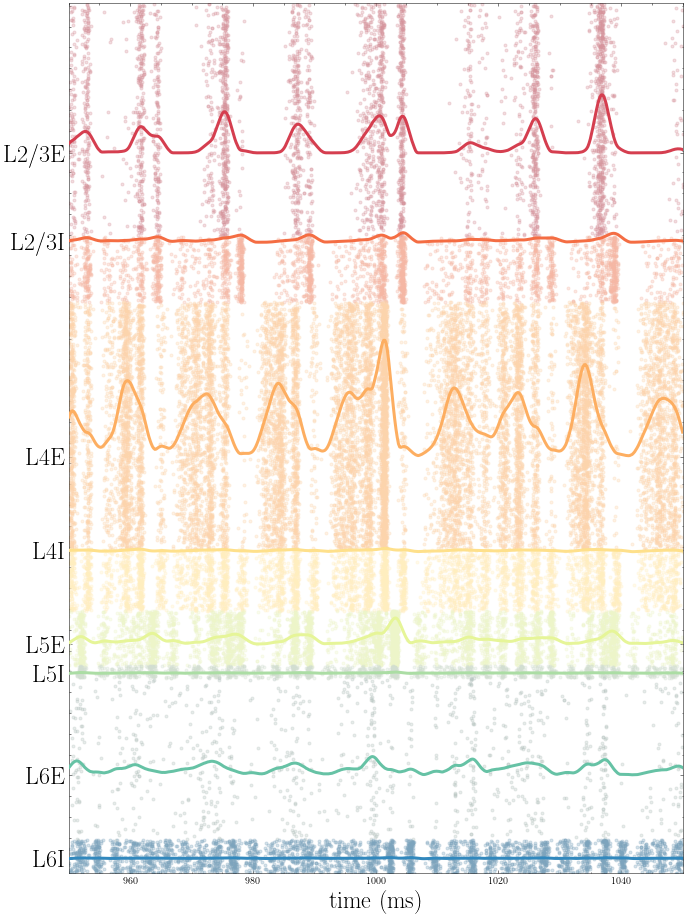

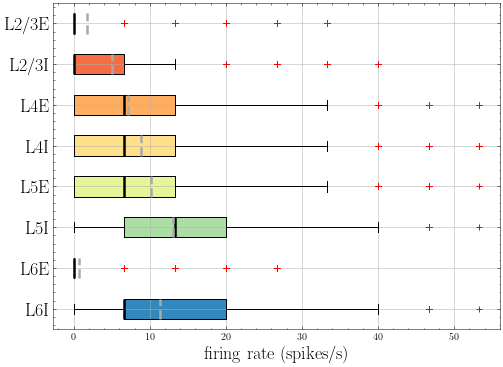

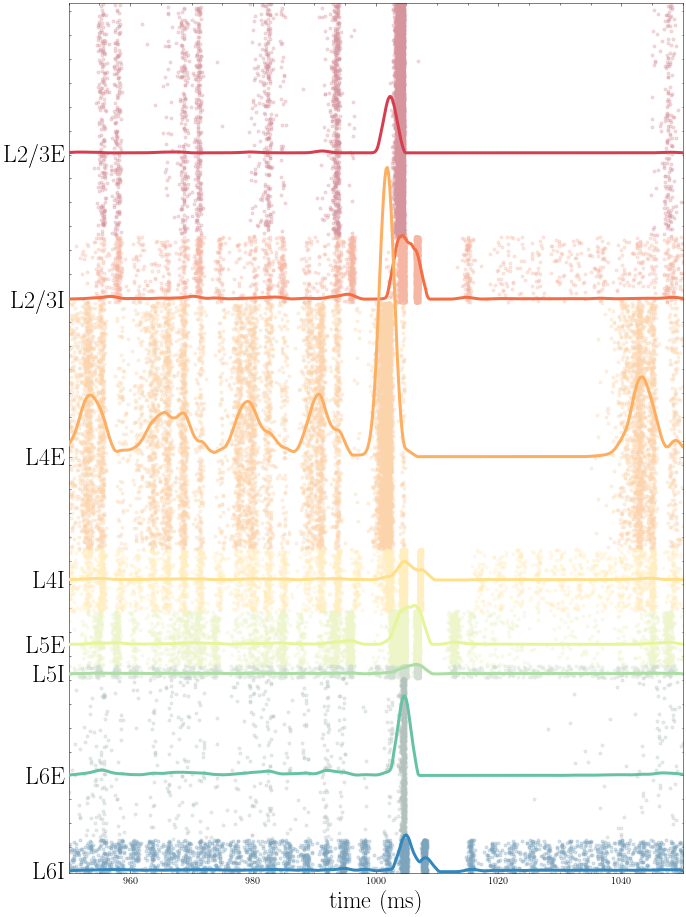

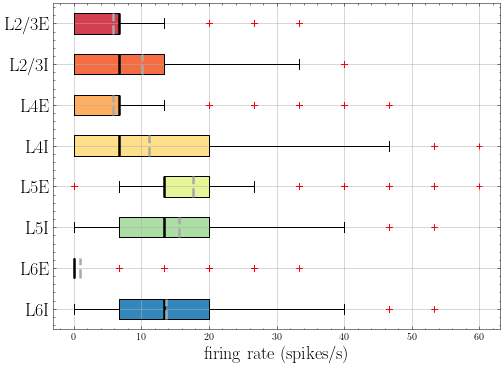

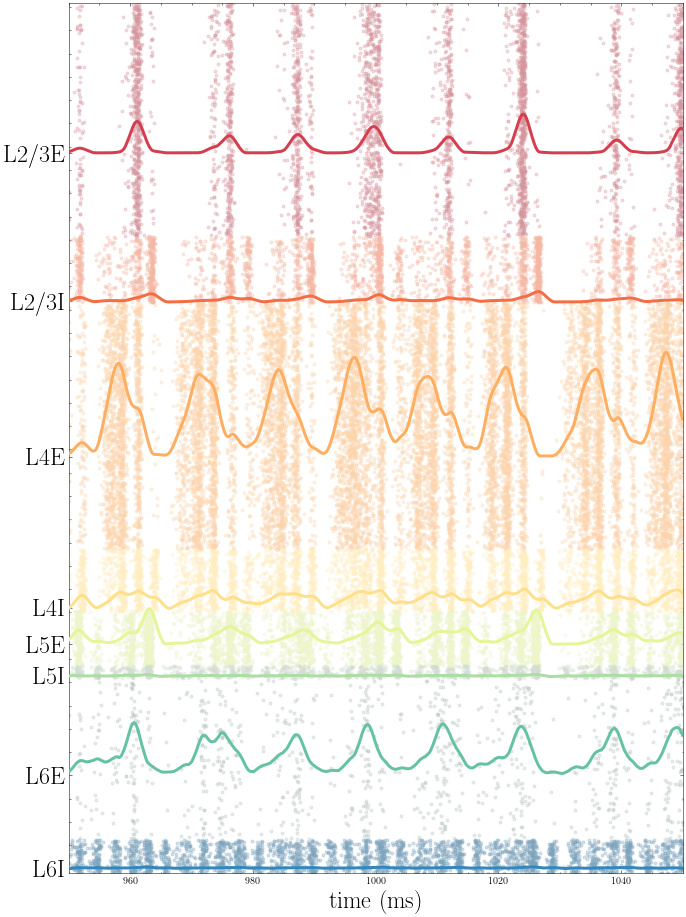

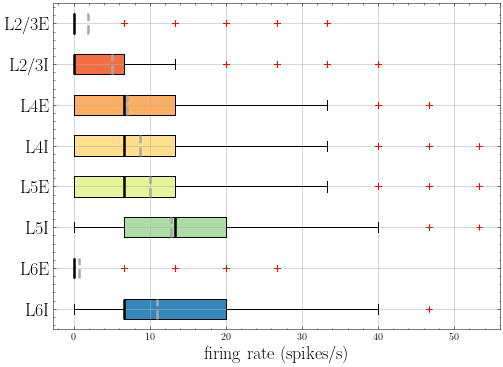

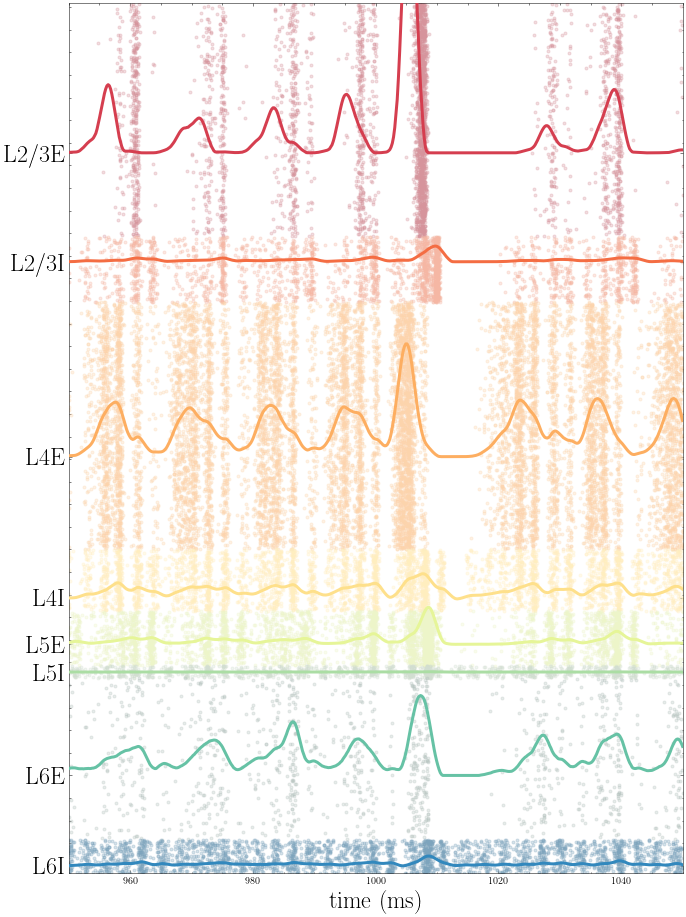

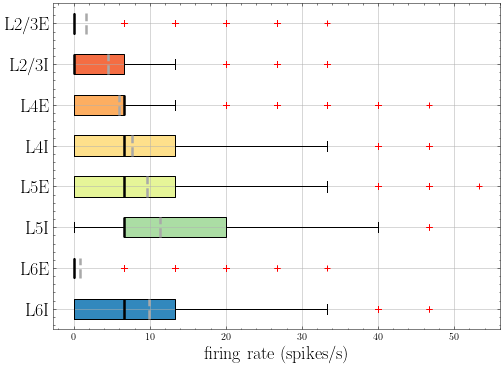

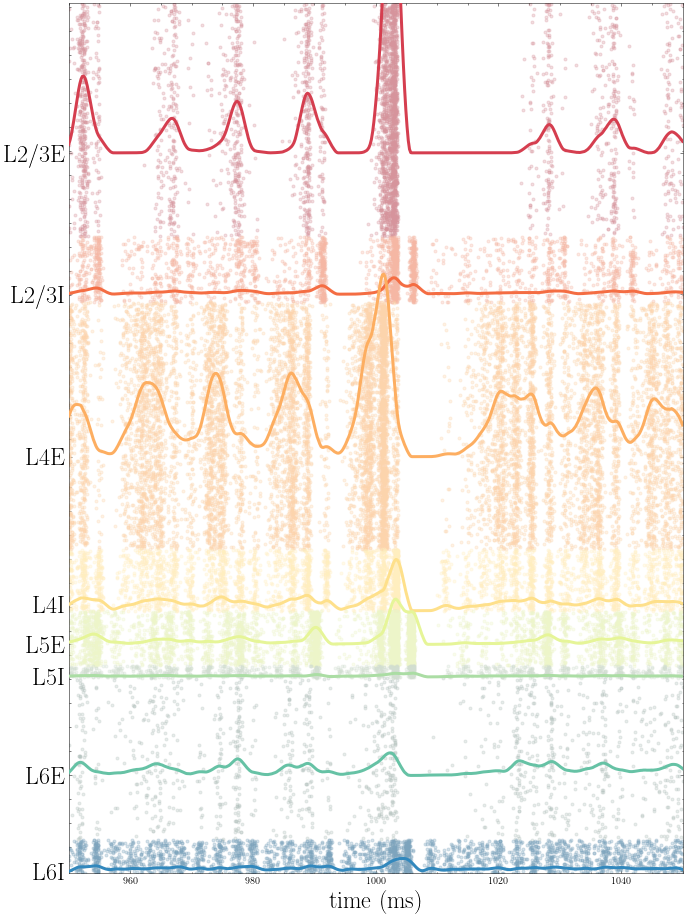

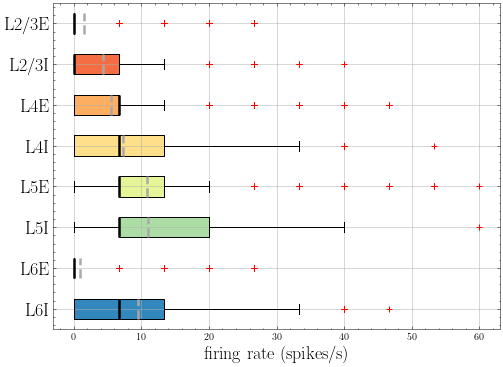

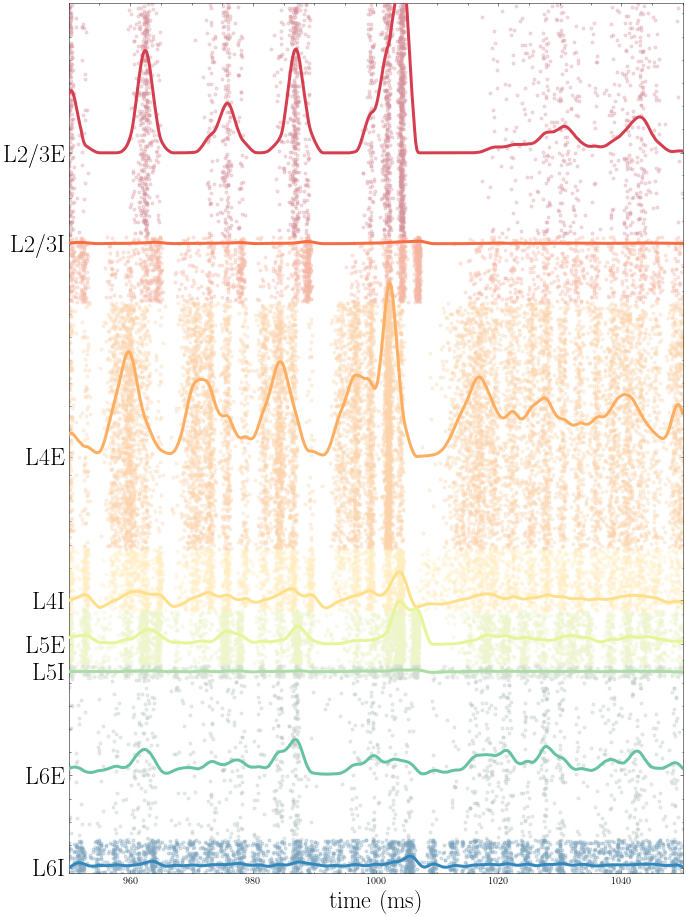

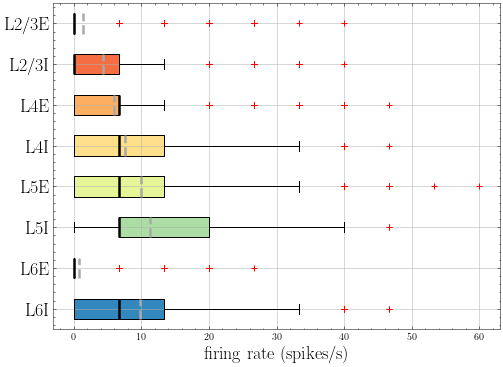

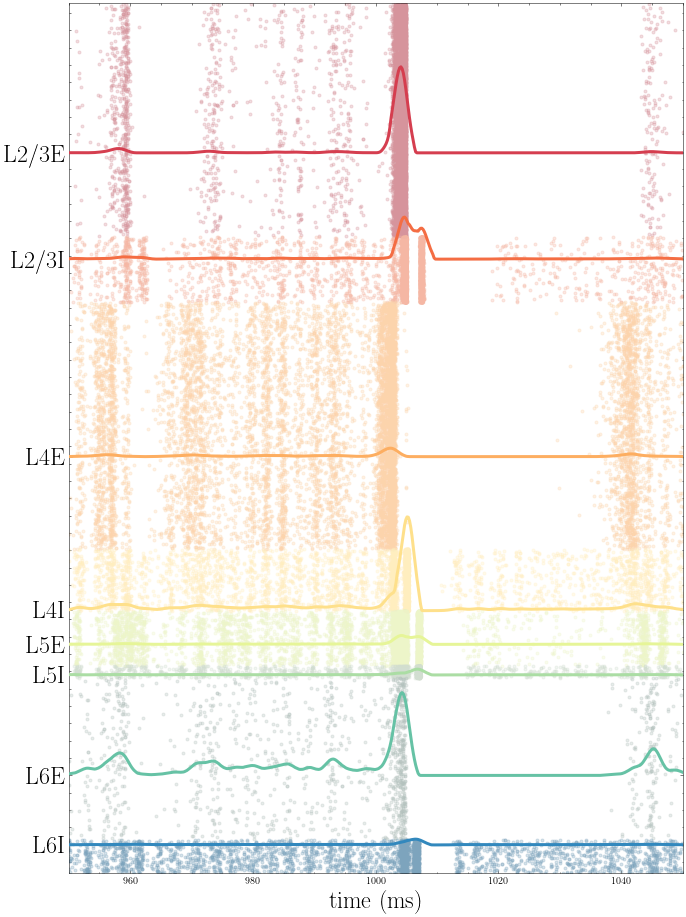

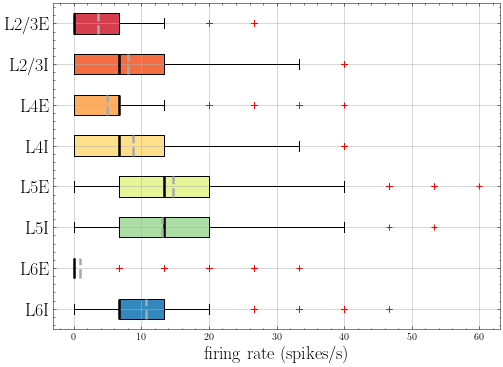

In [5]:

#General parameters
lowcut_gamma = 50
highcut_gamma = 95


stim_times = np.array([ 997.8,  998. ,  998.2,  998.4,  998.6,  998.8,  999. ,  999.2,999.4,  999.6,  999.8, 1000. , 1000.2])
stim_phases = np.array([-2.92757751, -2.40335249, -1.90014046, -1.41536854, -0.94643768,-0.49071067, -0.04566449,  0.39142258,  0.82302184,  1.25157779,1.67907069,  2.10700058,  2.53629895])



#stimulation parameters
target_population = [2,3]
stim_time_index = 489
stim_time_end = 512

number_of_trials = 1

max_times = np.zeros((8,len(stim_times)+1))
times_std = np.zeros((8,len(stim_times)+1))
times_trials = np.zeros((8,number_of_trials))
amplitude_values = np.zeros((8,len(stim_times)+1))
amplitude_std = np.zeros((8,len(stim_times)+1))
amplitude_trials = np.zeros((8,number_of_trials))

times_currents = np.linspace(addons.analysis_dict["analysis_start"],addons.analysis_dict["analysis_end"],num=int((addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"])))

ex_currents = np.zeros((len(stim_times)+1, 8,len(times_currents)))
ex_currents_trial = np.zeros((number_of_trials,8, len(times_currents)))
ex_currents_sum = np.zeros((len(stim_times)+1, 8,len(times_currents)))
ex_currents_sum_trial = np.zeros((number_of_trials,8, len(times_currents)))
in_currents = np.zeros((len(stim_times)+1, 8, len(times_currents)))
in_currents_trial = np.zeros((number_of_trials,8, len(times_currents)))
in_currents_sum = np.zeros((len(stim_times)+1, 8, len(times_currents)))
in_currents_sum_trial = np.zeros((number_of_trials,8, len(times_currents)))
volt_currents = np.zeros((len(stim_times)+1, 8, len(times_currents)))
volt_currents_trial = np.zeros((number_of_trials,8,len(times_currents)))
pop_activities = np.zeros((len(stim_times)+1,8,len(times_currents)*5))

path_name = "stimulation/data_pulse_packet_2_layers/"

#FIRST, a run without stimulation

for l in range(0,number_of_trials):
    net = network.Network(sim_dict, net_dict, stim_dict, path = path_name)
    net.create()
    net.connect()

    #data_synapses = addons.number_synapses(net.pops)
    net.simulate(sim_dict["t_presim"])
    net.simulate(sim_dict["t_sim"])
    raster_plot_interval = np.array([950, 1050])
    firing_rates_interval = np.array([900,1050])

    pop_activity, times_a = net.evaluate(raster_plot_interval, firing_rates_interval,binned=True,trial=l)

    if l == 0: 
        for i, n in enumerate(pop_activity):
            pop_activities[0][i] = pop_activity[n]

    time_index = np.argwhere(times_a[0]> times_a[0][stim_time_end] + 2.5)[0][0]

    pop_signal_gamma = {}
    phase = {}
    phase_times = {}
    amplitude = {}
    amplitude_times = {}

    for i in range(len(pop_activity)):
        pop_signal_gamma[i] = filter_signal(pop_activity[i],fs=1000,lowcut=lowcut_gamma,highcut=highcut_gamma)


    pop_activity_hilbert = {}
    for i in range(len(pop_activity)):
        pop_activity_hilbert[i] = hilbert_transform(pop_signal_gamma[i])
        phase[i] = np.angle(pop_activity_hilbert[i][time_index::])
        phase_times = times_a[i][time_index+1::]

        max_phase = argrelextrema(phase[i], np.greater)
        times_trials[i][l] = phase_times[max_phase[0][0]]


        amplitude[i] = np.abs(pop_activity_hilbert[i][time_index::])
        max_amplitude = argrelextrema(amplitude[i],np.greater)
        amplitude_trials[i][l] = max_amplitude[0][0]

    #get currents
    name = path_name
    neuron_id = np.loadtxt(name + "population_nodeids.dat",dtype=int)
    num_neurons = []
    for i in range(len(neuron_id)):
        num_neurons = np.append(num_neurons,int(neuron_id[i][1]-neuron_id[i][0]+1))
    num_neurons = num_neurons.astype(int)

    voltage_data = addons.load_data(name,"voltmeter",)
    time_data = voltage_data[0]["time_ms"][0::num_neurons[0]]
    #time_data = addons.get_time(voltage_data,num_neurons[0]) 
    data_pop = {}
    ex_current_pop = {}
    in_current_pop = {}
    pop_activity = {}
    names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
    for i in range(len(num_neurons)):
        data_pop[i] = addons.split_data(voltage_data[i], num_neurons[i])

    del(voltage_data)
    ex_current_data = addons.load_data(name,"ex_current",type="Current")
    for i in range(len(num_neurons)):
        ex_current_pop[i] = addons.split_data(ex_current_data[i],num_neurons[i],type="Current")

    del(ex_current_data)
    in_current_data = addons.load_data(name,"in_current",type="Current")
    for i in range(len(num_neurons)):
        in_current_pop[i] = addons.split_data(in_current_data[i], num_neurons[i],type="Current")
    del(in_current_data)
    volt_currents_trial[l], ex_currents_trial[l], in_currents_trial[l], times, times_help, ex_currents_sum_trial[l], in_currents_sum_trial[l] = prepare_data(data_pop,ex_current_pop,in_current_pop)

for i in range(len(max_times)):
    max_times[i][0] = np.mean(times_trials[i])
    times_std[i][0] = np.std(times_trials[i])
    amplitude_values[i][0] = np.mean(amplitude_trials[i])
    amplitude_std[i][0] = np.std(times_trials[i])

volt_help = np.zeros((8,1000))
ex_help = np.zeros((8,1000))
in_help = np.zeros((8,1000))
ex_help2 = np.zeros((8,1000))
in_help2 = np.zeros((8,1000))
for i in range(0,number_of_trials):
    volt_help = volt_help + volt_currents_trial[i]
    ex_help = ex_help + ex_currents_trial[i]
    in_help = in_help + in_currents_trial[i]
    ex_help2 = ex_help2 + ex_currents_sum_trial[i]
    in_help2 = in_help2 + in_currents_sum_trial[i]

for i in range(len(max_times)):
    volt_currents[0][i] = volt_help[i] / number_of_trials
    ex_currents[0][i] = ex_help[i] / number_of_trials
    in_currents[0][i] = in_help[i] / number_of_trials
    ex_currents_sum[0][i] = ex_help2[i] / number_of_trials
    in_currents_sum[0][i] = in_help2[i] / number_of_trials



for i in range(len(stim_times)):
    #NOW, looping over stimulation times
    for l in range(0,number_of_trials):
        net = network.Network(sim_dict, net_dict, stim_dict, path = path_name,stim_time = stim_times[i])
        net.create()
        net.connect()

    #data_synapses = addons.number_synapses(net.pops)

        net.simulate(sim_dict["t_presim"])
        net.simulate(sim_dict["t_sim"])
        raster_plot_interval = np.array([950, 1050])
        firing_rates_interval = np.array([900,1050])

        pop_activity, times_a = net.evaluate(raster_plot_interval, firing_rates_interval,binned=True,trial=l)

        time_index = np.argwhere(times_a[0]> times_a[0][stim_time_end] + 2.5)[0][0]
        pop_signal_gamma = {}
        phase = {}
        phase_times = {}
        amplitude = {}
        amplitude_times = {}

        if l == 0: 
            for k in range(len(pop_activity)):
                pop_activities[i+1][k] = pop_activity[k]

        for j in range(len(pop_activity)):
            pop_signal_gamma[j] = filter_signal(pop_activity[j],fs=1000,lowcut=lowcut_gamma,highcut=highcut_gamma)


        pop_activity_hilbert = {}
        for j in range(len(pop_activity)):
            if j != target_population:
                pop_activity_hilbert[j] = hilbert_transform(pop_signal_gamma[j])
                phase[j] = np.angle(pop_activity_hilbert[j][time_index::])
                phase_times = times_a[j][time_index+1::]

                max_phase = argrelextrema(phase[j], np.greater)
                times_trials[j][l] = phase_times[max_phase[0][0]]

                amplitude[j] = np.abs(pop_activity_hilbert[j][time_index::])
                max_amplitude = argrelextrema(amplitude[j],np.greater)
                amplitude_trials[j][l] = max_amplitude[0][0]
            else:
                pop_activity_hilbert[j] = hilbert_transform(pop_signal_gamma[j])
                phase[j] = np.angle(pop_activity_hilbert[j][stim_time_end::])
                phase_times = times_a[j][stim_time_end+1::]

                max_phase = argrelextrema(phase[j], np.greater)
                times_trials[j][l] = phase_times[max_phase[0][0]]


                amplitude[j] = np.abs(pop_activity_hilbert[j][stim_time_end::])
                max_amplitude = argrelextrema(amplitude[j],np.greater)
                amplitude_trials[j][l] = max_amplitude[0][0]

            name = path_name
        neuron_id = np.loadtxt(name + "population_nodeids.dat",dtype=int)
        num_neurons = []
        for j in range(len(neuron_id)):
            num_neurons = np.append(num_neurons,int(neuron_id[j][1]-neuron_id[j][0]+1))
        num_neurons = num_neurons.astype(int)

        voltage_data = addons.load_data(name,"voltmeter",)
        time_data = voltage_data[0]["time_ms"][0::num_neurons[0]]
        #time_data = addons.get_time(voltage_data,num_neurons[0]) 
        data_pop = {}
        ex_current_pop = {}
        in_current_pop = {}
        pop_activity = {}
        names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
        for j in range(len(num_neurons)):
            data_pop[j] = addons.split_data(voltage_data[j], num_neurons[j])

        del(voltage_data)
        ex_current_data = addons.load_data(name,"ex_current",type="Current")
        for j in range(len(num_neurons)):
            ex_current_pop[j] = addons.split_data(ex_current_data[j],num_neurons[j],type="Current")

        del(ex_current_data)
        in_current_data = addons.load_data(name,"in_current",type="Current")
        for j in range(len(num_neurons)):
            in_current_pop[j] = addons.split_data(in_current_data[j], num_neurons[j],type="Current")
        del(in_current_data)
        volt_currents_trial[l], ex_currents_trial[l], in_currents_trial[l], times, times_help, ex_currents_sum_trial[l], in_currents_sum_trial[l] = prepare_data(data_pop,ex_current_pop,in_current_pop)

    for j in range(len(max_times)):
        max_times[j][i+1] = np.mean(times_trials[j])
        times_std[j][i+1] = np.std(times_trials[j])
        amplitude_values[j][i+1] = np.mean(amplitude_trials[j])
        amplitude_std[j][i+1]= np.std(times_trials[j])


    volt_help = np.zeros((8,1000))
    ex_help = np.zeros((8,1000))
    in_help = np.zeros((8,1000))
    ex_help2 = np.zeros((8,1000))
    in_help2 = np.zeros((8,1000))
    for j in range(0,number_of_trials):
        volt_help = volt_help + volt_currents_trial[j]
        ex_help = ex_help + ex_currents_trial[j]
        in_help = in_help + in_currents_trial[j]
        ex_help2 = ex_help2 + ex_currents_sum_trial[j]
        in_help2 = in_help2 + in_currents_sum_trial[j]

    for j in range(len(max_times)):
        volt_currents[i+1][j] = volt_help[j] / number_of_trials
        ex_currents[i+1][j] = ex_help[j] / number_of_trials
        in_currents[i+1][j] = in_help[j] / number_of_trials
        ex_currents_sum[i+1][j] = ex_help2[j] / number_of_trials
        in_currents_sum[i+1][j] = in_help2[j] / number_of_trials

(-2.92757751, 2.53629895)

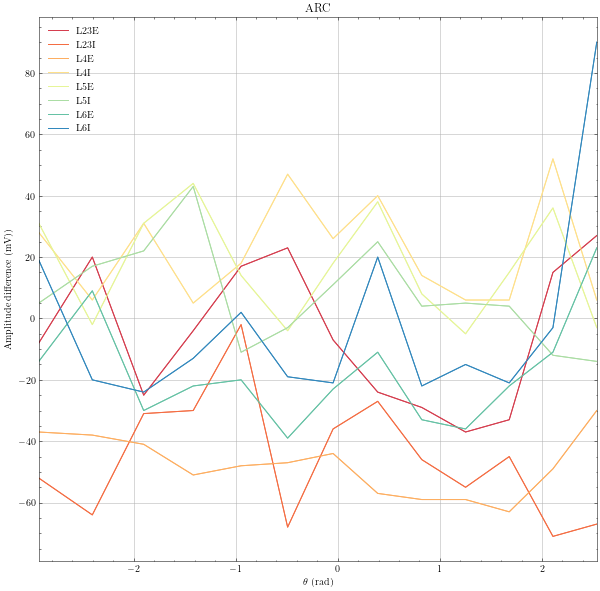

In [6]:
import matplotlib.pyplot as plt 


pops = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
plt.figure(figsize=(10,10))

for i in range(0,net.num_pops):
    plt.plot(stim_phases,amplitude_values[i][1::]-amplitude_values[i][0], label = pops[i], color = colours[i])
    plt.errorbar(stim_phases,amplitude_values[i][1::]-amplitude_values[i][0],amplitude_std[i][1::],color=  colours[i])
plt.legend()
plt.grid()
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Amplitude difference (mV))')
plt.title('ARC')
plt.xlim(stim_phases[0],stim_phases[-1])


(-2.92757751, 2.53629895)

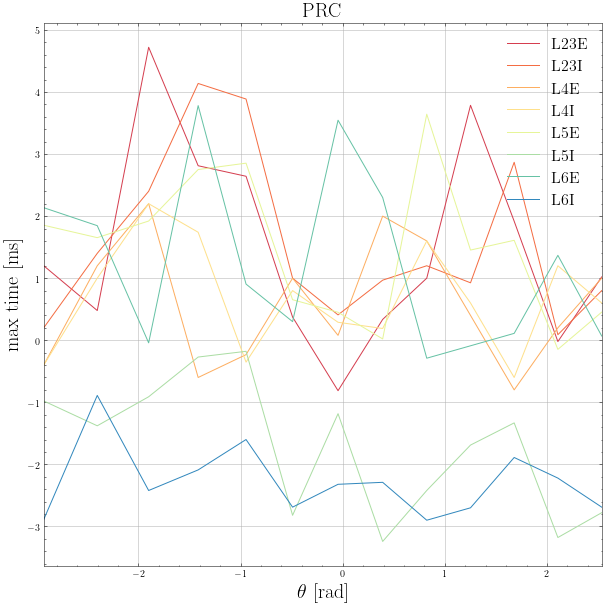

In [10]:
import matplotlib.pyplot as plt 
fonstize = 20

pops = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
plt.figure(figsize=(10,10))

for i in range(0,net.num_pops):
    plt.plot(stim_phases,max_times[i][1::]-max_times[i][0], label = pops[i], color = colours[i])
plt.legend(prop={'size': 16}, loc = 'upper right')
plt.grid()
plt.xlabel(r'$\theta$ [rad]', fontsize = fonstize)
plt.ylabel('max time [ms]', fontsize = fonstize)
plt.title('PRC', fontsize = fonstize)
plt.xlim(stim_phases[0],stim_phases[-1])

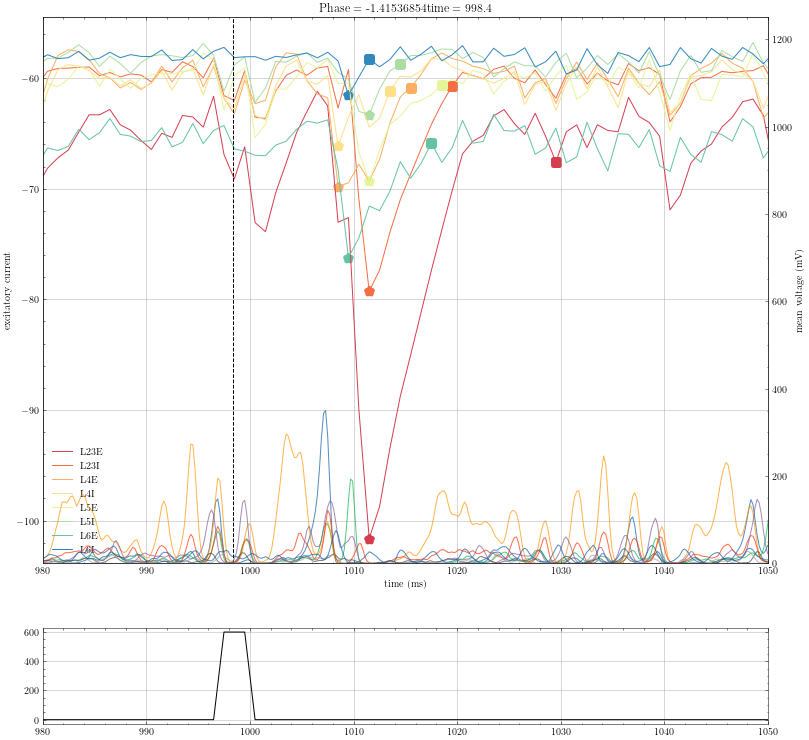

In [8]:
import matplotlib.pyplot as plt 
phase_plot = 4

fig, axs = plt.subplots(figsize=(13,13), nrows=2,height_ratios=[0.85,0.15])

ax1 = axs[0]
ax3 = axs[1]

ax1.set_xlabel('time (ms)')
ax1.set_ylabel('excitatory current')
ax1.set_xlim(980,1050)

ax2 = ax1.twinx()
time_pop = np.linspace(900,1100,num=int((1100-900)/0.2))
ax2.set_ylabel('pop activity')
ax2.set_ylim(0,1250)
colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
stim_times = np.array([0, 997.8,  998. ,  998.2,  998.4,  998.6,  998.8,  999. ,  999.2,999.4,  999.6,  999.8, 1000. , 1000.2])
stim_phases = np.array([0,-2.92757751, -2.40335249, -1.90014046, -1.41536854, -0.94643768,-0.49071067, -0.04566449,  0.39142258,  0.82302184,  1.25157779,1.67907069,  2.10700058,  2.53629895])

diff = 0.5
volt_threshold = [-80,-70,-65,-65,-70,-62,-65,-60]
volt_amplitude = np.zeros((len(stim_times),8))
volt_spike_time = np.zeros((len(stim_times),8))
volt_return = np.zeros((len(stim_times),8))

time_plot = np.linspace(500,1500,num=1000)
pop= [ 'L23E', 'L23I', 'L4E', 'L4I', 'L5E', 'L5I', 'L6E', 'L6I']

for j in range(len(volt_currents)):
    for i in range(len(volt_currents[0])):
        volt_measuring_window = volt_currents[j][i][np.argwhere(np.abs(time_plot-stim_times[phase_plot])<1)[0][0]-5:np.argwhere(np.abs(time_plot-stim_times[phase_plot])<1)[0][0]+int(16/1)]

        if j == phase_plot:
            ax1.plot(time_plot,volt_currents[phase_plot][i],label = pop[i],color=colours[i])
            ax2.plot(time_pop,pop_activities[phase_plot][i], label = pop[i],alpha = 0.7)
        help = np.mean(volt_currents[j][i])
        volt_amplitude[j][i] = np.min(volt_measuring_window)
        #volt_amplitude[j][i] = volt_measuring_window[np.argwhere(volt_measuring_window[argrelextrema(volt_measuring_window,np.less)]<volt_threshold[i])][0][0]
        a = np.argwhere(volt_currents[j][i] == volt_amplitude[j][i])[0][0]
        volt_spike_time[j][i] = time_plot[a]
        volt_return[j][i] = time_plot[np.argwhere(np.abs(volt_currents[j][i][a:] - help) < diff)[0][0]+ a]


for i in range(len(volt_return[phase_plot])):
    ax1.scatter(volt_return[phase_plot][i],volt_currents[phase_plot][i][np.argwhere(time_plot == volt_return[phase_plot][i])[0][0]],color=colours[i],marker='s',linewidths=5)
    ax1.scatter(volt_spike_time[phase_plot][i],volt_amplitude[phase_plot][i],marker='*',color=colours[i],linewidths=5)
ax1.axvline(stim_times[phase_plot], color='black',ls='--')
plt.xlabel('time (ms)')
plt.ylabel('mean voltage (mV)')
plt.title('Phase = ' + str(stim_phases[phase_plot])+ 'time = ' + str(stim_times[phase_plot]))
ax1.legend()
ax1.grid()


pulse_function = np.zeros(len(volt_currents[0][0]))
pulse_function[int(stim_times[phase_plot]-500)-1:int(stim_times[phase_plot]-500)+2] = 600
ax3.plot(time_plot,pulse_function,color='black')
ax3.set_xlim(980,1050)
ax3.grid()

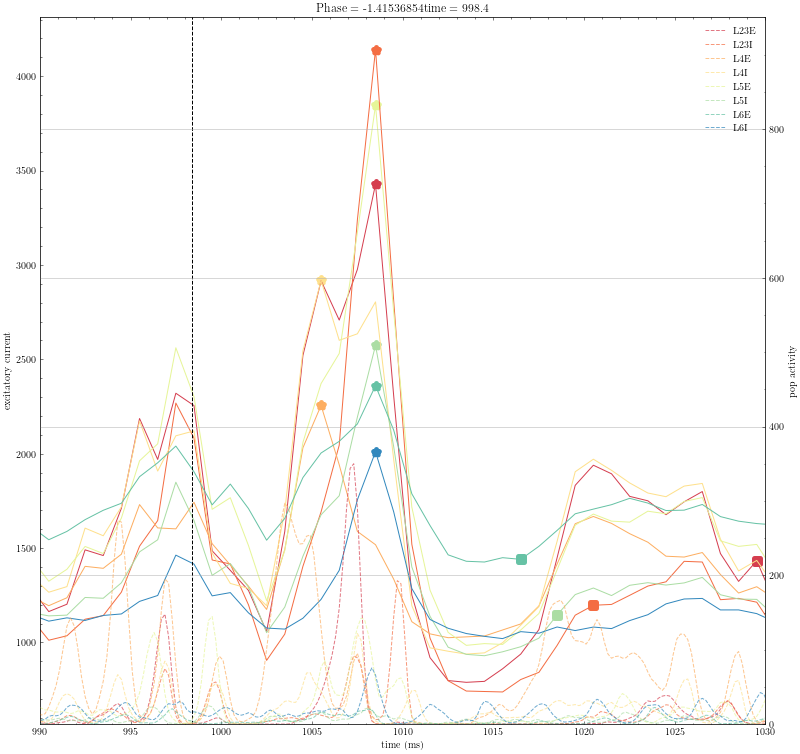

In [9]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(13,13))

ax1.set_xlabel('time (ms)')
ax1.set_ylabel('excitatory current')
ax1.set_xlim(990,1030)

ax2 = ax1.twinx()

ax2.set_ylabel('pop activity')
ax2.set_ylim(0,950)

ex_amplitude = np.zeros((len(stim_times),8))
ex_spike_time = np.zeros((len(stim_times),8))
ex_return = np.zeros((len(stim_times),8))
diff = 25
colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
time_plot = np.linspace(500,1500,num=1000)
pop= [ 'L23E', 'L23I', 'L4E', 'L4I', 'L5E', 'L5I', 'L6E', 'L6I']
for j in range(len(ex_currents)):
    for i in range(len(ex_currents[0])):
        ex_measuring_window = ex_currents[j][i][np.argwhere(np.abs(time_plot-stim_times[phase_plot])<1)[0][0]-5:np.argwhere(np.abs(time_plot-stim_times[phase_plot])<1)[0][0]+int(16/1)]

        if j ==phase_plot:
            ax1.plot(time_plot,ex_currents[phase_plot][i],label = pop[i],color= colours[i])
            ax2.plot(time_pop,pop_activities[phase_plot][i],'--',label = pop[i], alpha = 0.7,color=colours[i])
        help = np.mean(ex_currents[j][i])   
        ex_amplitude[j][i] = np.max(ex_measuring_window)
        a = np.argwhere(ex_currents[j][i] == ex_amplitude[j][i])[0][0]
        ex_spike_time[j][i] = time_plot[a]
        b = np.argwhere(ex_currents[j][i] == np.min(ex_measuring_window))[0][0]
        ex_return[j][i] = time_plot[np.argwhere((np.abs(ex_currents[j][i][b:] - help) < diff) & ((ex_currents[j][i][b:] - help) < 0 ))[0][0]+ a]


for i in range(len(ex_return[phase_plot])):
    ax1.scatter(ex_return[phase_plot][i],ex_currents[phase_plot][i][np.argwhere(time_plot == ex_return[phase_plot][i])[0][0]],color=colours[i],marker='s',linewidths=5)
    ax1.scatter(ex_spike_time[phase_plot][i],ex_amplitude[phase_plot][i],marker='*',color=colours[i],linewidths=5)
ax1.axvline(stim_times[phase_plot], color='black',ls='--')

plt.title('Phase = ' + str(stim_phases[phase_plot])+ 'time = ' + str(stim_times[phase_plot]))
plt.legend()
plt.grid()

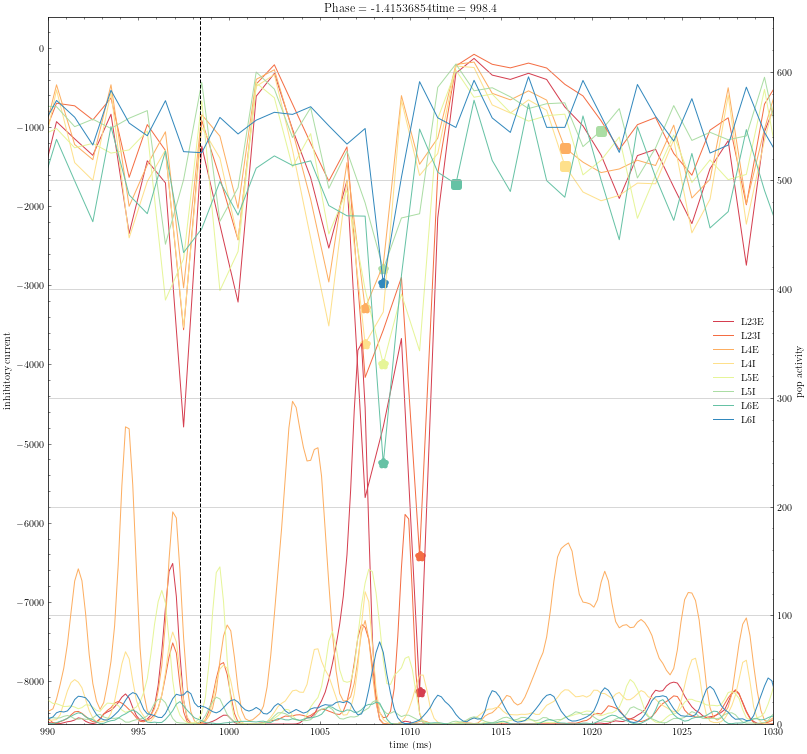

In [10]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(13,13))

ax1.set_xlabel('time (ms)')
ax1.set_ylabel('inhibitory current')
ax1.set_xlim(990,1030)
ax2 = ax1.twinx()

ax2.set_ylabel('pop activity')
ax2.set_ylim(0,650)
diff = 50
in_amplitude = np.zeros((len(stim_times),8))
in_spike_time = np.zeros((len(stim_times),8))
in_return = np.zeros((len(stim_times),8))

colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
time_plot = np.linspace(500,1500,num=1000)
pop= [ 'L23E', 'L23I', 'L4E', 'L4I', 'L5E', 'L5I', 'L6E', 'L6I']
for j in range(len(in_currents)):
    for i in range(len(in_currents[0])):
        in_measuring_window = in_currents[j][i][np.argwhere(np.abs(time_plot-stim_times[phase_plot])<1)[0][0]-5:np.argwhere(np.abs(time_plot-stim_times[phase_plot])<1)[0][0]+int(16/1)]
        if j ==phase_plot:
            ax1.plot(time_plot,in_currents[phase_plot][i],label = pop[i],color=colours[i])
            ax2.plot(time_pop,pop_activities[phase_plot][i], label = pop[i],color=colours[i])
        help = np.mean(in_currents[j][i])   
        in_amplitude[j][i] = np.min(in_measuring_window)
        a = np.argwhere(in_currents[j][i] == in_amplitude[j][i])[0][0]
        in_spike_time[j][i] = time_plot[a]
        in_return[j][i] = time_plot[np.argwhere((np.abs(in_currents[j][i][a:] - help) < diff))[0][0]+ a]


for i in range(len(in_return[phase_plot])):
    ax1.scatter(in_return[phase_plot][i],in_currents[phase_plot][i][np.argwhere(time_plot == in_return[phase_plot][i])[0][0]],color=colours[i],marker='s',linewidths=5)
    ax1.scatter(in_spike_time[phase_plot][i],in_amplitude[phase_plot][i],marker='*',color=colours[i],linewidths=5)
ax1.axvline(stim_times[phase_plot], color='black',ls='--')

plt.title('Phase = ' + str(stim_phases[phase_plot])+ 'time = ' + str(stim_times[phase_plot]))
plt.legend(loc='right')
plt.grid()

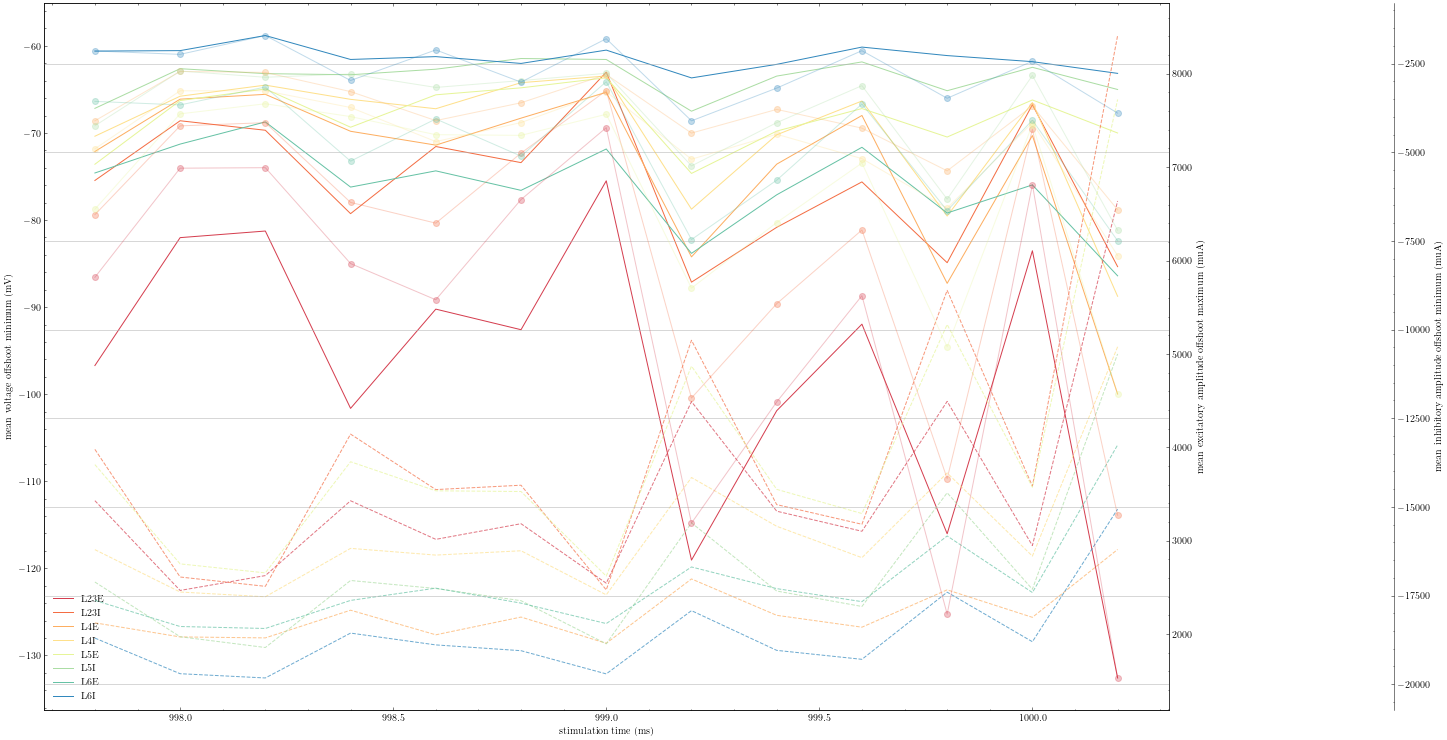

In [11]:
if len(volt_amplitude[0]) != len(stim_times):
    volt_amplitude = volt_amplitude.transpose()
if len(ex_amplitude[0]) != len(stim_times):
    ex_amplitude = ex_amplitude.transpose()
if len(in_amplitude[0]) != len(stim_times):
    in_amplitude = in_amplitude.transpose()

fig, ax = plt.subplots(figsize=(25,13))
fig.subplots_adjust(right = 0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

twin2.spines.right.set_position(('axes',1.2))


colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
for i in range(len(volt_amplitude)):
    ax.plot(stim_times[1::],volt_amplitude[i][1::],label = pop[i],color=colours[i])
    twin1.plot(stim_times[1::],ex_amplitude[i][1::],'--',label = pop[i],color=colours[i],alpha = 0.7)
    twin2.scatter(stim_times[1::],in_amplitude[i][1::],label = pop[i],color=colours[i],alpha = 0.3)
    twin2.plot(stim_times[1::],in_amplitude[i][1::],label = pop[i],color=colours[i],alpha = 0.3)

ax.set_xlabel(r'stimulation time (ms)')
ax.set_ylabel('mean voltage offshoot minimum (mV)')
twin1.set_ylabel('mean excitatory amplitude offshoot maximum (muA)')
twin2.set_ylabel('mean inhibitory amplitude offshoot minimum (muA)')
ax.legend()
plt.grid()

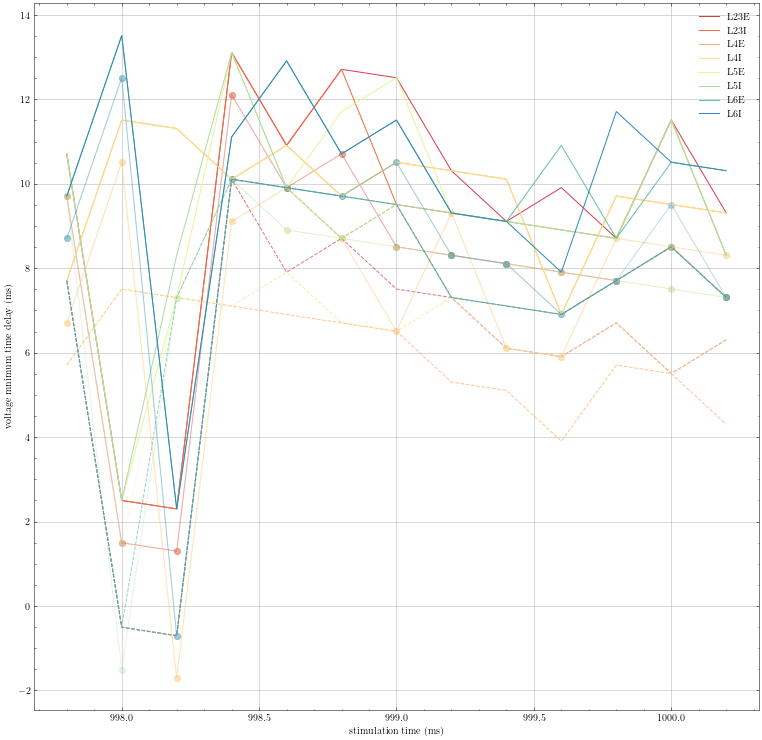

In [12]:
plt.figure(figsize=(13,13))
if len(volt_spike_time[0]) != len(stim_times):
    volt_spike_time = volt_spike_time.transpose()
if len(ex_spike_time[0]) != len(stim_times):
    ex_spike_time = ex_spike_time.transpose()
if len(in_spike_time[0]) != len(stim_times):
    in_spike_time = in_spike_time.transpose()
colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
for i in range(len(volt_spike_time)):
    plt.plot(stim_times[1::],volt_spike_time[i][1::]-stim_times[1::],label = pop[i],color=colours[i])
    plt.plot(stim_times[1::],ex_spike_time[i][1::]-stim_times[1::],'--',color=colours[i],alpha = 0.7)
    plt.scatter(stim_times[1::],in_spike_time[i][1::]-stim_times[1::],color=colours[i],alpha = 0.3)
    plt.plot(stim_times[1::],in_spike_time[i][1::]-stim_times[1::],color=colours[i],alpha = 0.3)

plt.xlabel(r'stimulation time (ms)')
plt.ylabel('voltage mnimum time delay (ms)')
plt.legend()
plt.grid()

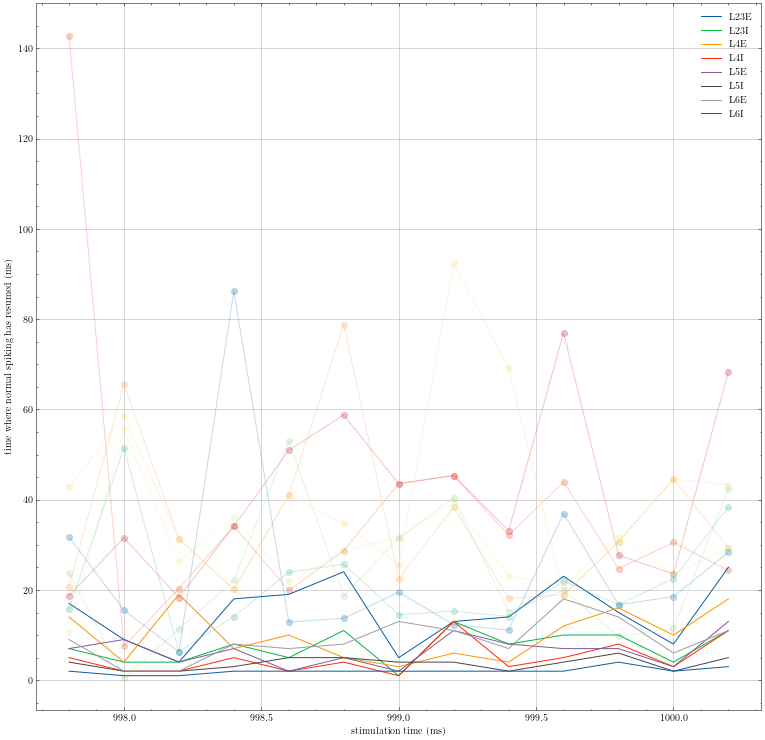

In [13]:
plt.figure(figsize=(13,13))
if len(volt_return[0]) != len(stim_times):
    volt_return = volt_return.transpose()
if len(ex_return[0]) != len(stim_times):
    ex_return = ex_return.transpose()
if len(in_return[0]) != len(stim_times):
    in_return = in_return.transpose()
colours = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']

for i in range(len(volt_return)):
    plt.plot(stim_times[1::],volt_return[i][1::]-volt_spike_time[i][1::],label = pop[i])
    #plt.plot(stim_times[1::],ex_return[i][1::]-stim_times[1::],'--',color=colours[i],alpha = 0.7)
    plt.scatter(stim_times[1::],in_return[i][1::]-stim_times[1::],color=colours[i],alpha = 0.3)
    plt.plot(stim_times[1::],in_return[i][1::]-stim_times[1::],color=colours[i],alpha = 0.3)

plt.xlabel(r'stimulation time (ms)')
plt.ylabel('time where normal spiking has resumed (ms)')
plt.legend()
plt.grid()